In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model

2024-04-01 22:55:52.050478: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('./../ejerciciosModelosSupervisados/deteccion_transacciones_fraudulentas/datos/data_fraude.csv')

In [3]:
# pre-process datos (si es necesario)
df = df.rename(columns={'0.1':'Class'}).drop('Unnamed: 0',axis=1)

In [4]:
yvar = df.Class
xvars = df[[x for x in df.columns if x != 'Class']]

In [5]:
# dividir train / test para variables independientes (x)  y dependiente (y)
xtrain, xtest, ytrain, ytest = train_test_split(xvars, yvar, train_size = 0.80, random_state = 2)

In [6]:
# convertir datos en numpy arrays

xtrain = np.array(xtrain)
xtest= np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [7]:
# arquitectura del modelo utilizando variables - FUNCTIONAL API

# input
model_input = Input(shape=(xtrain.shape[1],))
# primera capa
layer_1 = Dense(256, kernel_regularizer='l2', activation='relu')(model_input)
#segunda capa
layer_2 = Dense(128, kernel_regularizer='l2', activation='relu')(layer_1)
# predicción
model_output = Dense(1, activation='sigmoid')(layer_2)
# entrada y salida
model = Model(inputs=model_input, 
              outputs=model_output)

In [9]:
error_train_history = []
error_test_history = []

num_epochs = 50

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002)

binary_crossentropy = tf.keras.losses.BinaryCrossentropy()

for i in range(num_epochs):
    
    print('epoch number: {i}'.format(i=i+1))
    
    with tf.GradientTape() as t:
        
        # aplicar coeficientes a variables y predecir la y
        ytrain_hat = model(xtrain)
        ytest_hat = model(xtest)
        # calcular el error (que buscamos reducir)
        error_train = binary_crossentropy(tf.expand_dims(ytrain, 1), ytrain_hat)
        error_test = binary_crossentropy(tf.expand_dims(ytest, 1), ytest_hat)
        # guardar el error para visualizar luego
        error_train_history.append(error_train.numpy())
        error_test_history.append(error_test.numpy())
        # calcular los gradientes de cada uno de los coeficientes con respecto al error
    gradients = t.gradient(error_train, model.trainable_weights)
    # restar los gradientes * learning_rate a cada uno de los coeficientes
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))     
    print('train error: {error_train}, test error: {error_test}'.format(error_train=error_train,error_test=error_test))

epoch number: 1
train error: 1.6484265327453613, test error: 1.5707465410232544
epoch number: 2
train error: 1.5104765892028809, test error: 1.444577932357788
epoch number: 3
train error: 1.3750900030136108, test error: 1.320788860321045
epoch number: 4
train error: 1.242935061454773, test error: 1.199968695640564
epoch number: 5
train error: 1.1146405935287476, test error: 1.0828982591629028
epoch number: 6
train error: 0.9917961955070496, test error: 0.9710285663604736
epoch number: 7
train error: 0.8773170113563538, test error: 0.8666148781776428
epoch number: 8
train error: 0.7754176259040833, test error: 0.7731159329414368
epoch number: 9
train error: 0.6904057264328003, test error: 0.6938340067863464
epoch number: 10
train error: 0.6238500475883484, test error: 0.6304727792739868
epoch number: 11
train error: 0.5741455554962158, test error: 0.5822044610977173
epoch number: 12
train error: 0.5373450517654419, test error: 0.5458598732948303
epoch number: 13
train error: 0.509514749

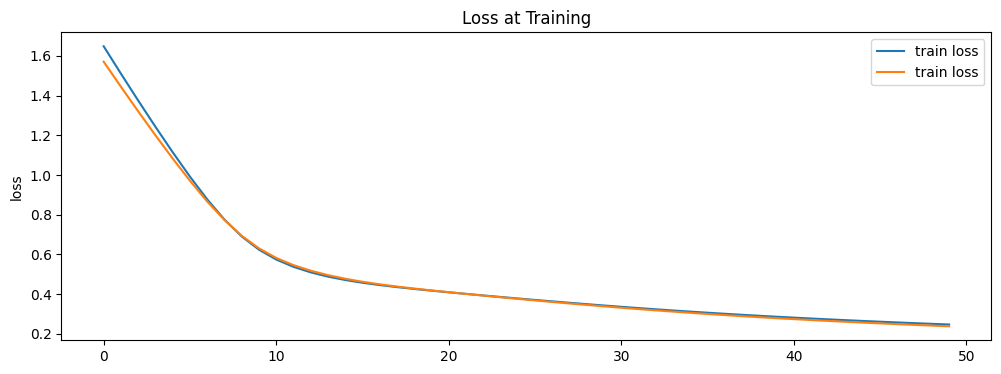

In [10]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(range(len(error_train_history)), error_train_history, label='train loss')
ax.plot(range(len(error_test_history)), error_test_history, label='train loss')
ax.legend()
plt.ylabel("loss")
plt.title('Error at Training')
plt.show()